# 1. Imports

In [114]:
import pandas as pd
import os
import missingno as msno
rating_file_path=os.getenv('HOME') + '/aiffel/recommendata_iu/data/ml-1m/ratings.dat'
ratings_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv(rating_file_path, sep='::', names=ratings_cols, engine='python')
orginal_data_size = len(ratings)
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


# 2. Data Processing

In [115]:
# 3점 이상만 남깁니다.
ratings = ratings[ratings['rating']>=3]
filtered_data_size = len(ratings)

print(f'orginal_data_size: {orginal_data_size}, filtered_data_size: {filtered_data_size}')
print(f'Ratio of Remaining Data is {filtered_data_size / orginal_data_size:.2%}')

orginal_data_size: 1000209, filtered_data_size: 836478
Ratio of Remaining Data is 83.63%


In [116]:
# rating 컬럼의 이름을 count로 바꿉니다.
ratings.rename(columns={'rating':'count'}, inplace=True)

In [117]:
ratings['count']


0          5
1          3
2          3
3          4
4          5
          ..
1000203    3
1000205    5
1000206    5
1000207    4
1000208    4
Name: count, Length: 836478, dtype: int64

In [118]:
ratings

,user_id,movie_id,count,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000203,6040,1090,3,956715518
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


### ㄴ 영화 제목이 movie_id로 분류되어있어 데이터 가시성이 낮으므로 title칼럼을 추가해준다.

In [119]:
ratings = pd.merge(ratings, movies, on=['movie_id']) #merge(원하는 열을 넣을 데이터, 참조할 데이터, on = 참조할 열)
ratings

,user_id,movie_id,count,timestamp,title,genre
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...
836473,5851,3607,5,957756608,One Little Indian (1973),Comedy|Drama|Western
836474,5854,3026,4,958346883,Slaughterhouse (1987),Horror
836475,5854,690,3,957744257,"Promise, The (Versprechen, Das) (1994)",Romance
836476,5938,2909,4,957273353,"Five Wives, Three Secretaries and Me (1998)",Documentary


## 1) Ratings에 있는 Unique한 영화 개수

In [120]:
ratings['movie_id'].nunique()

3628

## 2) rating에 있는 유니크한 사용자 수 

In [121]:
ratings['user_id'].nunique()

6039

## 3) 가장 인기 있는 영화 30개(인기순) 

In [124]:
ratings_count = ratings.groupby('title')['user_id'].count()
ratings_count.sort_values(ascending=False).head(30)

title
American Beauty (1999)                                   3211
Star Wars: Episode IV - A New Hope (1977)                2910
Star Wars: Episode V - The Empire Strikes Back (1980)    2885
Star Wars: Episode VI - Return of the Jedi (1983)        2716
Saving Private Ryan (1998)                               2561
Terminator 2: Judgment Day (1991)                        2509
Silence of the Lambs, The (1991)                         2498
Raiders of the Lost Ark (1981)                           2473
Back to the Future (1985)                                2460
Matrix, The (1999)                                       2434
Jurassic Park (1993)                                     2413
Sixth Sense, The (1999)                                  2385
Fargo (1996)                                             2371
Braveheart (1995)                                        2314
Men in Black (1997)                                      2297
Schindler's List (1993)                                  2257
Pr

## 불필요한 칼럼 제거

In [125]:
x = ratings['movie_id']
z = ratings['genre']
y = ratings['timestamp']
del ratings['timestamp']
del ratings['movie_id']
del ratings['genre']
ratings = pd.DataFrame(ratings, columns = ['user_id', 'title', 'count'])
ratings

,user_id,title,count
0,1,One Flew Over the Cuckoo's Nest (1975),5
1,2,One Flew Over the Cuckoo's Nest (1975),5
2,12,One Flew Over the Cuckoo's Nest (1975),4
3,15,One Flew Over the Cuckoo's Nest (1975),4
4,17,One Flew Over the Cuckoo's Nest (1975),5
...,...,...,...
836473,5851,One Little Indian (1973),5
836474,5854,Slaughterhouse (1987),4
836475,5854,"Promise, The (Versprechen, Das) (1994)",3
836476,5938,"Five Wives, Three Secretaries and Me (1998)",4


### ㄴ movie_id, genre, timestamp칼럼을 지워준다

## 결측치 확인

<AxesSubplot:>

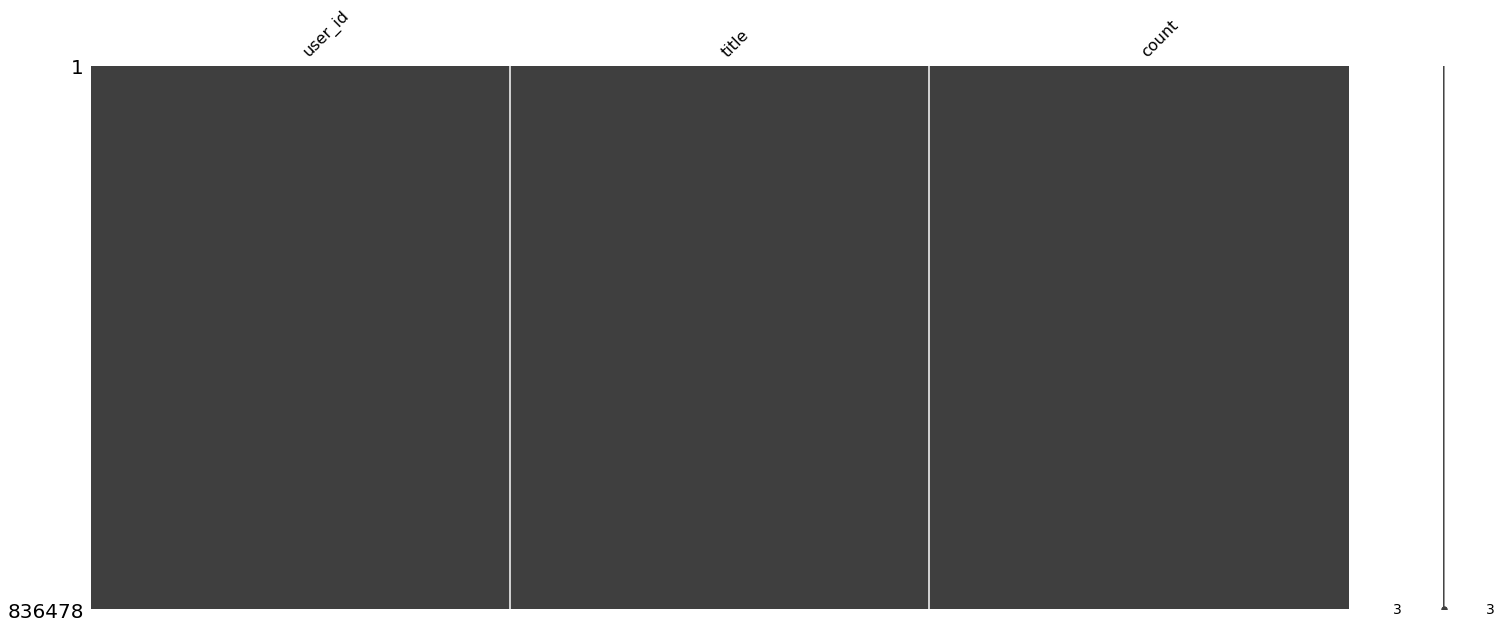

In [126]:
msno.matrix(ratings)

### ㄴ 결측치가 없는것을 확인했다.

In [127]:
# 영화 제목을 보기 위해 메타 데이터를 읽어옵니다.
movie_file_path=os.getenv('HOME') + '/aiffel/recommendata_iu/data/ml-1m/movies.dat'
cols = ['movie_id', 'title', 'genre'] 
movies = pd.read_csv(movie_file_path, encoding = 'ISO-8859-1', sep='::', names=cols, engine='python')
movies.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


# 4. 선호 영화 추가하기

### * 별점을 시청 횟수로 해석

In [128]:
my_favorite = ['Forrest Gump (1994)', 'Lion King, The (1994)', 'Death in Brunswick (1991)', 'Lost Horizon (1937)', 'Scarlet Letter, The (1926)' ]
my_playlist = pd.DataFrame({'user_id':['mapark']*5, 'title':my_favorite,'count':[30]*5})

if not ratings.isin({'user_id':['mapark']})['user_id'].any():
    ratings = ratings.append(my_playlist)
    
ratings.tail()

,user_id,title,count
0,mapark,Forrest Gump (1994),30
1,mapark,"Lion King, The (1994)",30
2,mapark,Death in Brunswick (1991),30
3,mapark,Lost Horizon (1937),30
4,mapark,"Scarlet Letter, The (1926)",30


In [129]:
my_playlist

,user_id,title,count
0,mapark,Forrest Gump (1994),30
1,mapark,"Lion King, The (1994)",30
2,mapark,Death in Brunswick (1991),30
3,mapark,Lost Horizon (1937),30
4,mapark,"Scarlet Letter, The (1926)",30


In [130]:
ratings

,user_id,title,count
0,1,One Flew Over the Cuckoo's Nest (1975),5
1,2,One Flew Over the Cuckoo's Nest (1975),5
2,12,One Flew Over the Cuckoo's Nest (1975),4
3,15,One Flew Over the Cuckoo's Nest (1975),4
4,17,One Flew Over the Cuckoo's Nest (1975),5
...,...,...,...
0,mapark,Forrest Gump (1994),30
1,mapark,"Lion King, The (1994)",30
2,mapark,Death in Brunswick (1991),30
3,mapark,Lost Horizon (1937),30


# 5. Indexing

In [131]:
user_unique = ratings['user_id'].unique()
title_unique = ratings['title'].unique()

# 유저, 아티스트 indexing 하는 코드 idx는 index의 약자입니다.
user_to_idx = {v:k for k,v in enumerate(user_unique)}
title_to_idx = {v:k for k,v in enumerate(title_unique)}

In [132]:
print(user_to_idx['mapark'])    # 358869명의 유저 중 마지막으로 추가된 유저이니 358868이 나와야 합니다. 
print(title_to_idx['Scarlet Letter, The (1926)'])

6039
1339


In [133]:
# indexing을 통해 데이터 컬럼 내 값을 바꾸는 코드
# dictionary 자료형의 get 함수는 https://wikidocs.net/16 을 참고하세요.

# user_to_idx.get을 통해 user_id 컬럼의 모든 값을 인덱싱한 Series를 구해 봅시다. 
# 혹시 정상적으로 인덱싱되지 않은 row가 있다면 인덱스가 NaN이 될 테니 dropna()로 제거합니다. 
temp_user_data = ratings['user_id'].map(user_to_idx.get).dropna()
if len(temp_user_data) == len(ratings):   # 모든 row가 정상적으로 인덱싱되었다면
    print('user_id column indexing OK!!')
    ratings['user_id'] = temp_user_data   # data['user_id']을 인덱싱된 Series로 교체해 줍니다. 
else:
    print('user_id column indexing Fail!!')

# artist_to_idx을 통해 artist 컬럼도 동일한 방식으로 인덱싱해 줍니다. 
temp_title_data = ratings['title'].map(title_to_idx.get).dropna()
if len(temp_title_data) == len(ratings):
    print('title column indexing OK!!')
    ratings['title'] = temp_title_data
else:
    print('title column indexing Fail!!')

ratings

user_id column indexing OK!!
title column indexing OK!!


,user_id,title,count
0,0,0,5
1,1,0,5
2,2,0,4
3,3,0,4
4,4,0,5
...,...,...,...
0,6039,160,30
1,6039,330,30
2,6039,3562,30
3,6039,2092,30
